# Real-time Object Detection
### Complete # TODO

# Requirements

In [1]:
from matplotlib import pyplot as plt
import numpy as np
import os
import cv2
import time

# Loading Model

In [2]:
PROTOTXT_ADDRESS = os.path.join("model", "deploy.prototxt")
MODEL_ADDRESS = os.path.join("model", "mobilenet_iter_73000.caffemodel")
CONFIDENCE = 0.2

CLASSES = [
    "background",
    "aeroplane",
    "bicycle",
    "bird",
    "boat",
    "bottle",
    "bus",
    "car",
    "cat",
    "chair",
    "cow",
    "diningtable",
    "dog",
    "horse",
    "motorbike",
    "person",
    "pottedplant",
    "sheep",
    "sofa",
    "train",
    "tvmonitor",
]

COLORS = np.random.uniform(0, 255, size=(len(CLASSES), 3))

net = cv2.dnn.readNetFromCaffe(PROTOTXT_ADDRESS, MODEL_ADDRESS)

# Object Detection Function

In [4]:
def detect_object(frame, network):
    (h, w) = frame.shape[:2]
    blob = cv2.dnn.blobFromImage(cv2.resize(frame, (300, 300)),
                                 0.007843, (300, 300), 127.5)
    network.setInput(blob)
    detections = network.forward()

    for i in np.arange(0, detections.shape[2]):
        confidence = detections[0, 0, i, 2]
        if confidence > CONFIDENCE:
            idx = int(detections[0, 0, i, 1])
            box = detections[0, 0, i, 3:7] * np.array([w, h, w, h])
            (startX, startY, endX, endY) = box.astype('int')
            label = "{}: {:.2f}%".format(CLASSES[idx], confidence * 100)
            cv2.rectangle(frame, (startX, startY), (endX, endY), COLORS[idx], 2)
            y = startY - 15 if startY - 15 > 15 else startY + 15
            cv2.putText(frame, label, (startX, y), cv2.FONT_HERSHEY_SIMPLEX, 0.5, COLORS[idx], 2)
    return frame



# Testing Object Detection Function

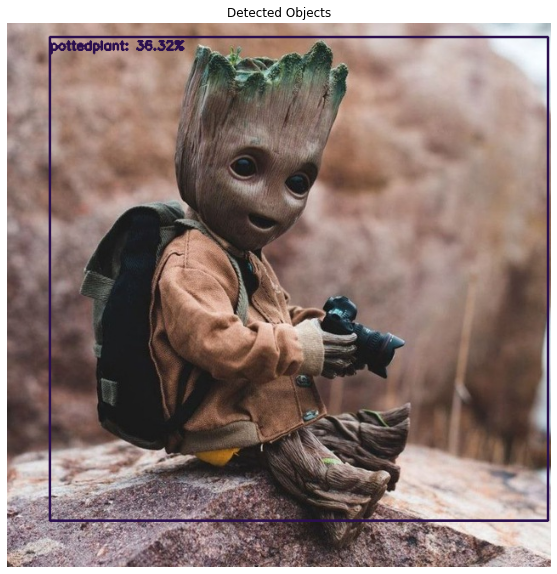

In [5]:
image_path = os.path.join("images", "photo_1.jpeg")  
image = cv2.imread(image_path)

image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

output_image = detect_object(image.copy(), net)

plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(output_image, cv2.COLOR_BGR2RGB))
plt.title("Detected Objects")
plt.axis("off")
plt.show()


# Real-time Object Detection Using WebCam

In [6]:
def visualize_fps(image, fps: int):
    if len(np.shape(image)) < 3:
        text_color = (255, 255, 255) 
    else:
        text_color = (0, 255, 0)  
    row_size = 20 
    left_margin = 24 
    font_size = 1
    font_thickness = 2
    fps_text = "FPS = {:.1f}".format(fps)
    text_location = (left_margin, row_size)
    cv2.putText(
        image,
        fps_text,
        text_location,
        cv2.FONT_HERSHEY_PLAIN,
        font_size,
        text_color,
        font_thickness,
    )
    return image



In [ ]:
CAMERA_DEVICE_ID = 0  
IMAGE_WIDTH = 800  
IMAGE_HEIGHT = 600  
fps = 0 

if __name__ == "__main__":  
    try:
        cap = cv2.VideoCapture(CAMERA_DEVICE_ID) 
        cap.set(cv2.CAP_PROP_FRAME_WIDTH, IMAGE_WIDTH)
        cap.set(cv2.CAP_PROP_FRAME_HEIGHT, IMAGE_HEIGHT)

        while True: 
            start_time = time.time()  
            
            ret, frame = cap.read() 
            if not ret:
                print("Failed to grab frame from camera.")
                break

            frame = cv2.resize(frame, (IMAGE_WIDTH, IMAGE_HEIGHT))  

            frame = detect_object(frame, net)  

            cv2.imshow("frame", visualize_fps(frame, fps)) 

            end_time = time.time() 
            
            
            seconds = end_time - start_time
            fps = 1.0 / seconds if seconds > 0 else 0

            if cv2.waitKey(33) == 27:  
                break
    except Exception as e: 
        print(e)
    finally:
        cv2.destroyAllWindows()  
        if 'cap' in locals() and cap is not None:
            cap.release() 



KeyboardInterrupt: 

: 

# Real-time Object Detection Using Video Stream

In [ ]:
CAMERA_DEVICE_ID = os.path.join("videos", "Jobs_2.mp4") 
IMAGE_WIDTH = 1000  
IMAGE_HEIGHT = 600  
fps = 0 
FRAME_RATE = 30
DURATION = 1 / FRAME_RATE  

if __name__ == "__main__":
    try:
        cap = cv2.VideoCapture(CAMERA_DEVICE_ID) 
        cap.set(cv2.CAP_PROP_FRAME_WIDTH, IMAGE_WIDTH)
        cap.set(cv2.CAP_PROP_FRAME_HEIGHT, IMAGE_HEIGHT)

        while True:
            start_time = time.time() 

            ret, frame = cap.read()  
            if not ret:
                print("End of video or failed to grab frame.")
                break
            frame = cv2.resize(frame, (IMAGE_WIDTH, IMAGE_HEIGHT)) 
            frame = detect_object(frame, net) 
            end_time = time.time() 

            seconds = end_time - start_time

            if seconds < DURATION:
                time.sleep(DURATION - seconds)

            total_time = time.time() - start_time
            fps = 1.0 / total_time if total_time > 0 else 0

            cv2.imshow("frame", visualize_fps(frame, fps))

            if cv2.waitKey(33) == 27:  
                break
    except Exception as e: 
        print(e)  
    finally:
        cv2.destroyAllWindows()  
        if 'cap' in locals() and cap is not None:
            cap.release()  


KeyboardInterrupt: 

: 